In [1]:
import pandas as pd

In [14]:
df=pd.read_csv("C:\\Users\\preetham\\Desktop\\WFT_SUV_EX_R1_.csv")

In [15]:
df.columns

Index(['Time', 'Veh_Speed', 'CS_RR', 'CS_RL', 'ARB_R', 'AXLE_RR_Z',
       'AXLE_RL_Z', 'RR_Mz', 'RR_Mx', 'RR_Fz', 'RR_Fy', 'RR_Fx', 'RL_Mz',
       'RL_Fz', 'RL_Fx', 'RRA_Z', 'RLA_Z', 'CG_X', 'CG_Y', 'CG_Z', 'pca2',
       'pca1'],
      dtype='object')

In [16]:
df.shape

(1048570, 22)

In [17]:
df.head()

,Time,Veh_Speed,CS_RR,CS_RL,ARB_R,AXLE_RR_Z,AXLE_RL_Z,RR_Mz,RR_Mx,RR_Fz,...,RL_Mz,RL_Fz,RL_Fx,RRA_Z,RLA_Z,CG_X,CG_Y,CG_Z,pca2,pca1
0,0.00000,0.01,0.791329,1.208697,-0.898207,-0.021657,0.321546,11.75,30.25,5800.0,...,10.0,6248.0,-130,0.982929,0.935858,0.257350,0.065857,1.057121,-235.643066,100.862209
1,0.00195,0.01,-0.363756,1.974889,-0.898207,-0.021657,0.477120,11.50,31.00,5804.0,...,11.0,6248.0,-126,0.981349,0.929481,0.251120,0.070528,1.054010,-234.744191,109.601234
2,0.00391,0.01,-1.326327,2.166437,-1.055078,-0.021657,0.477120,12.75,30.75,5802.0,...,11.5,6248.0,-120,0.984509,0.927886,0.248006,0.068971,1.046232,-234.552370,100.862209
3,0.00586,0.01,-1.711355,1.783341,-1.055078,-0.021657,0.477120,12.75,30.00,5800.0,...,11.5,6252.0,-116,0.987669,0.935858,0.251120,0.062743,1.033787,-233.653494,96.895292
4,0.00781,0.01,-0.941299,1.208697,-0.898207,0.133366,0.321546,12.75,29.50,5802.0,...,11.0,6250.0,-114,0.986089,0.947020,0.258907,0.053401,1.026009,-232.933533,94.032027


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
normalizedata=df

In [29]:
X=df[[ 'Time', 'Veh_Speed', 'CS_RR', 'CS_RL', 'ARB_R', 'AXLE_RR_Z',
       'AXLE_RL_Z', 'RR_Mz', 'RR_Mx', 'RR_Fz', 'RR_Fy', 'RR_Fx', 'RL_Mz',
       'RL_Fz', 'RL_Fx', 'RRA_Z', 'RLA_Z', 'CG_X', 'CG_Y', 'CG_Z', 'pca2',
       'pca1']]

In [21]:
def Normalization(num):
    normalizedata[X.columns[i]]=StandardScaler().fit_transform(df[X.columns[i]].values.reshape(-1,1))
for i in range(0,21):
    Normalization(i)

C:\Users\preetham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans =KMeans(n_clusters=2)

In [32]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
count1=0
count2=0
for i in kmeans.labels_:
    if i==1:
        count1=count1+1
    else:
        count2=count2+1

In [35]:
import seaborn as sn

In [36]:
k=list()
for i in kmeans.labels_:
    k.append(i)
k=pd.DataFrame(k,columns=["clusters"])

C:\Users\preetham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


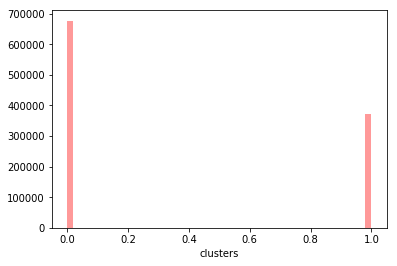

In [37]:
sn.distplot(k["clusters"],kde=False,color="red")